In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join as oj

In [13]:
# set the path we want to look at
# dataids = ["361247", "361243", "361242", "361251", "361253", "361260", "361259", "361256", "361254", "361622"]
dataids = ["361247", "361243", "361242", "361251", "361253", "361260", "361259", "361254", "361622"]
seed = "1"
metric = "rmse"
clustertype = "kmeans"
paths = []
for dataid in dataids:
    paths.append(oj("results", f"dataid{dataid}", f"seed{seed}", f"metric{metric}", str(clustertype)))

In [14]:
data_results = []
for path in paths:
    files = os.listdir(path)
    method_results = []
    for file in files:
        method_result = pd.read_csv(oj(path, file))
        method_result = method_result.rename(columns={"rmse": file[:-4]})
        method_results.append(method_result)
    data_result = pd.concat(method_results, axis=1)
    data_result = data_result.loc[:, ~data_result.columns.str.contains('^Unnamed')]
    data_result = data_result.loc[:, ~data_result.columns.duplicated()]
    data_results.append(data_result)

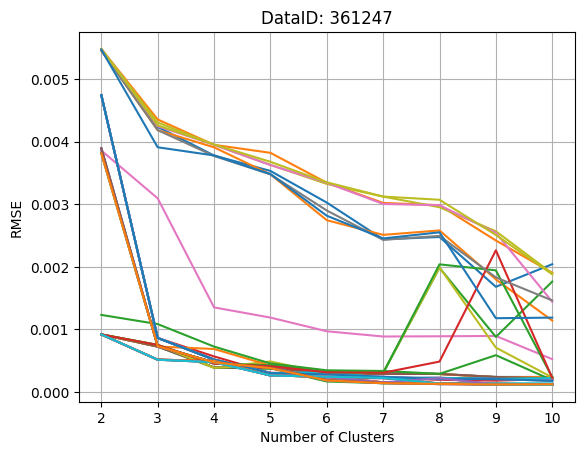

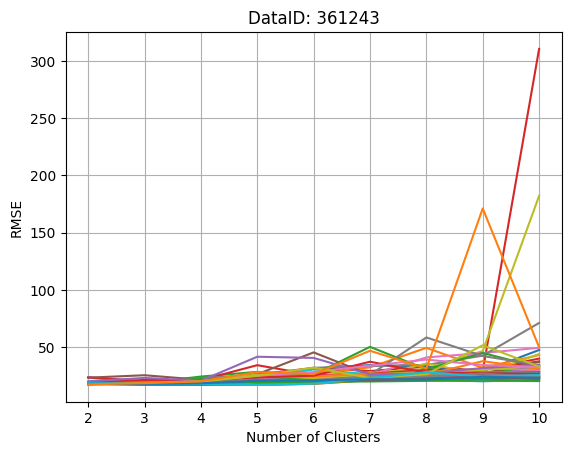

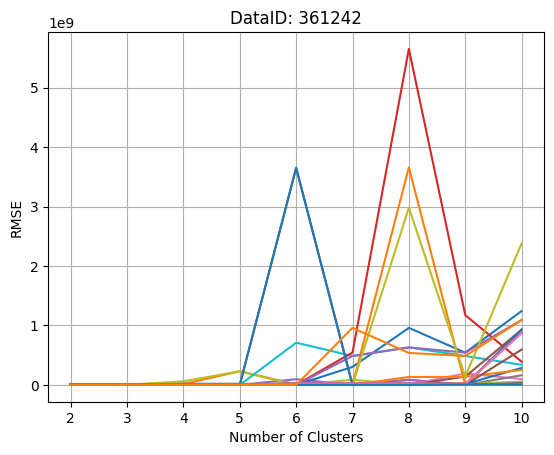

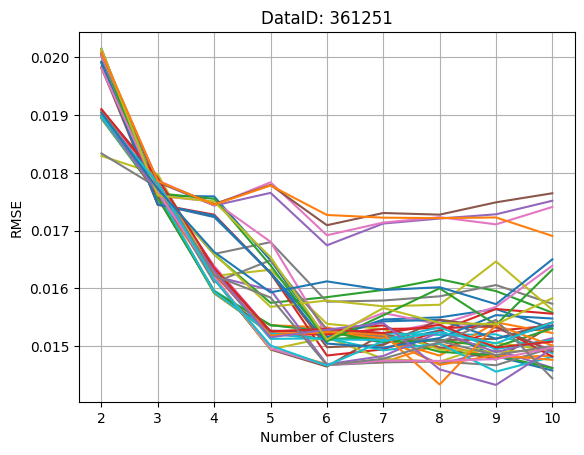

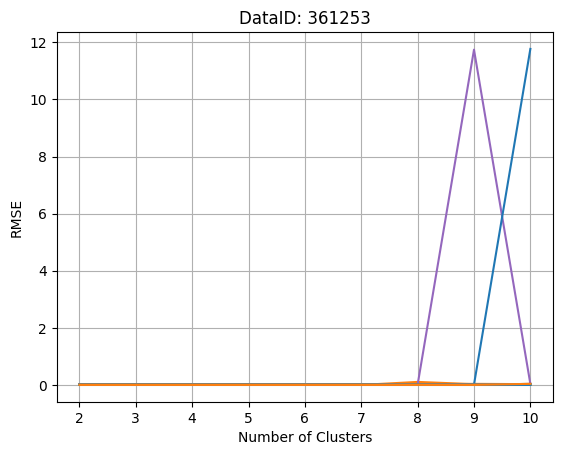

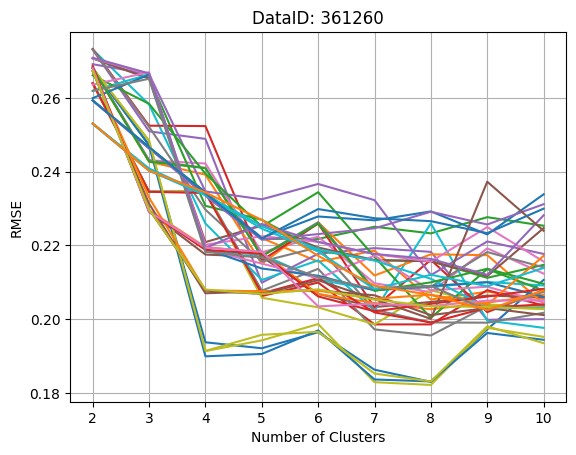

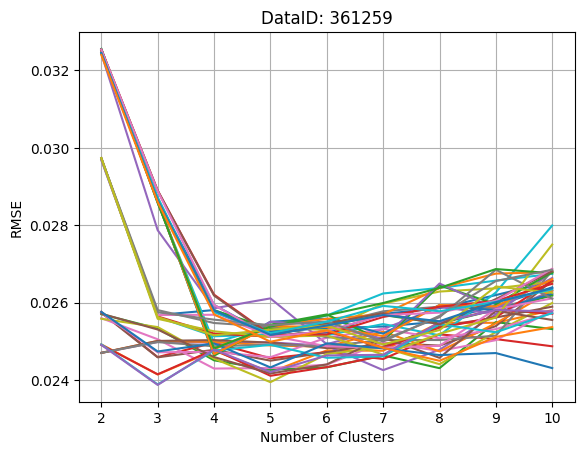

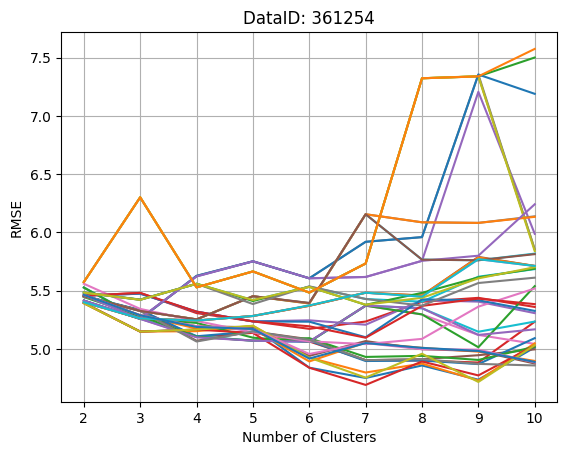

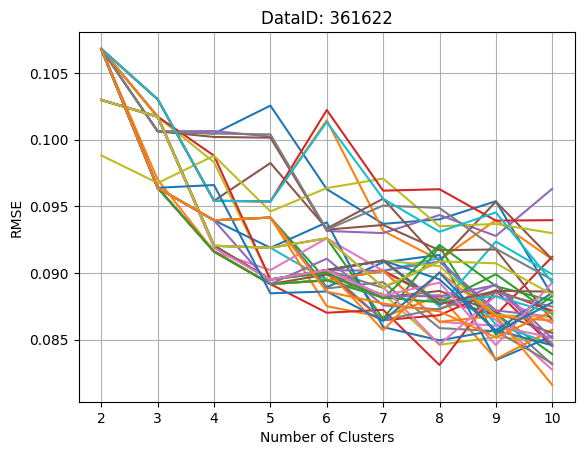

In [15]:
# plot the data, with nclust on x-axis and the rest being lines
i = 0
for data_result in data_results:
    data_result = data_result.set_index("nclust")
    data_result.plot(grid=True)
    # y axis label is RMSE
    plt.ylabel("RMSE")
    # x axis label is number of clusters
    plt.xlabel("Number of Clusters")
    # title is the dataid
    plt.title("DataID: " + dataids[i])
    # move legend to side
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # remove legend
    plt.legend().remove()
    plt.show()
    i+=1


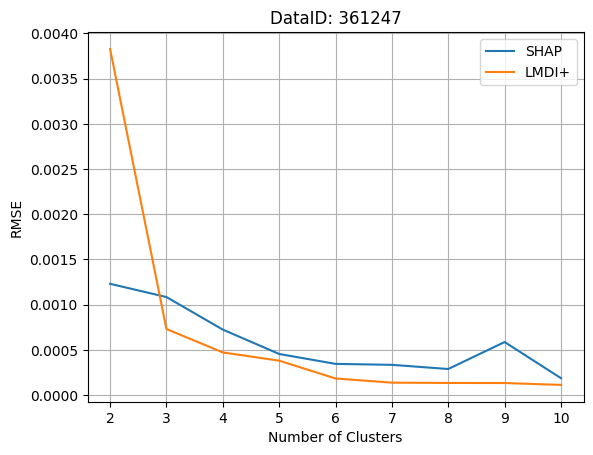

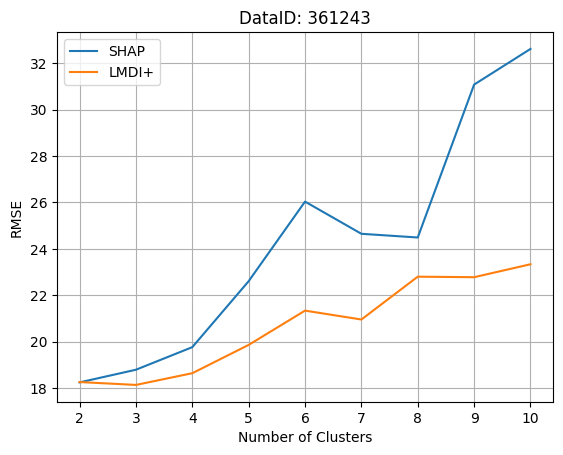

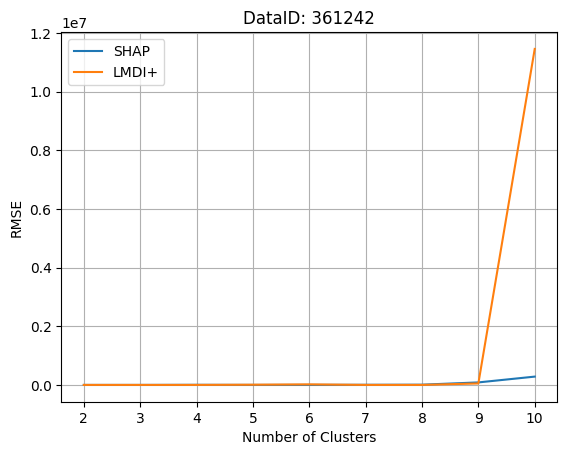

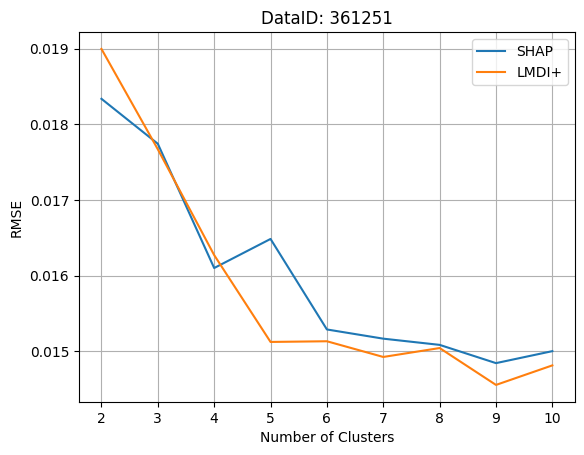

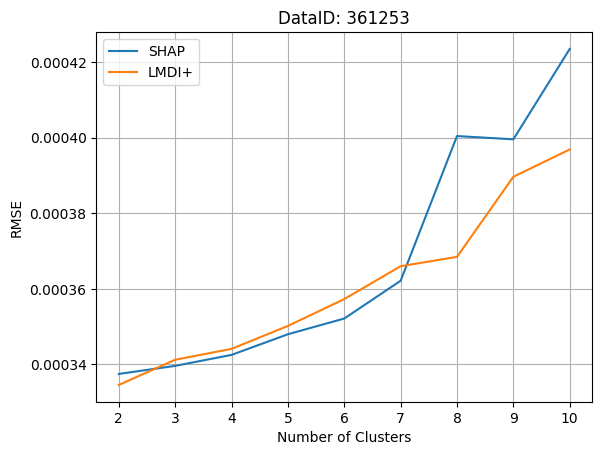

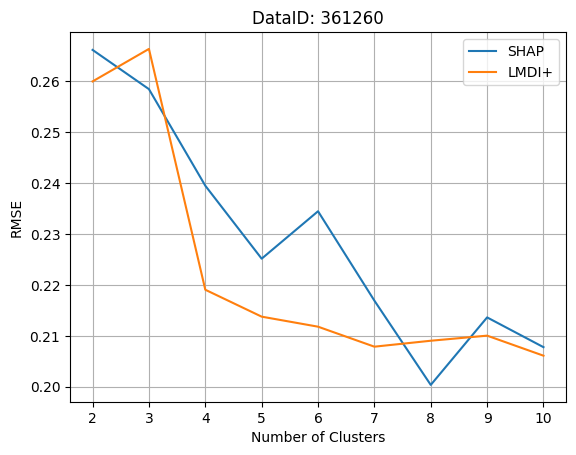

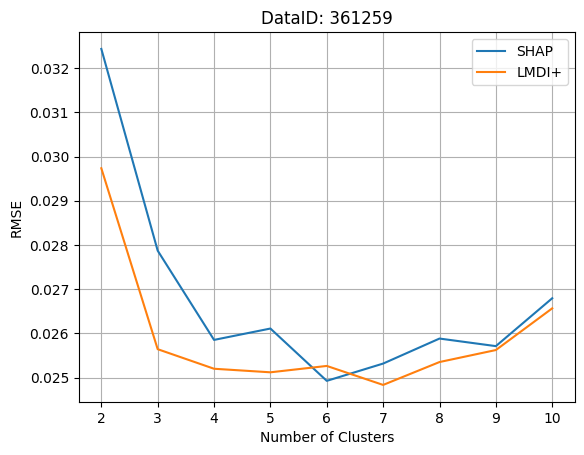

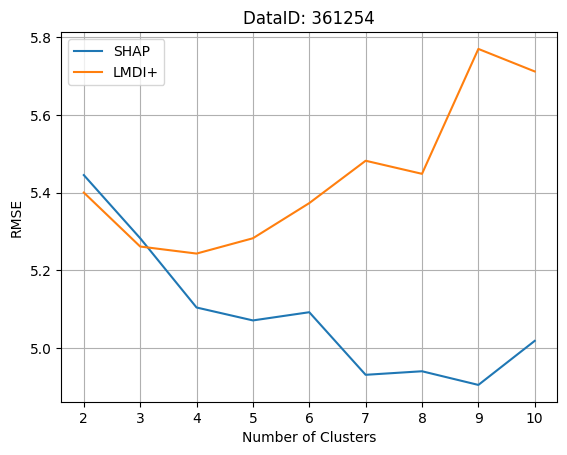

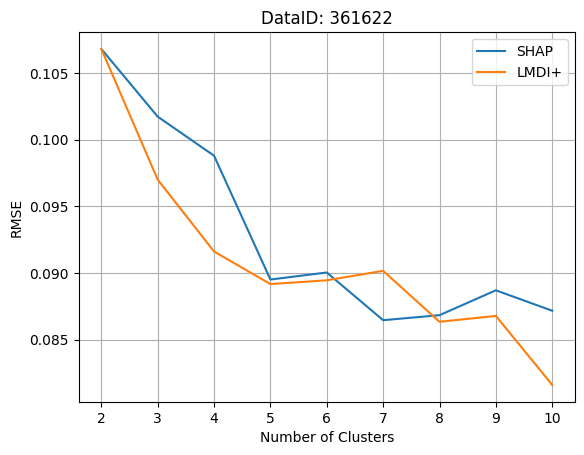

In [16]:
# plot the data, only shap and aloo_l2_unsigned_nonnormed_leafavg_rank
i=0
for data_result in data_results:
    data_result = data_result.set_index("nclust")
    data_result[["shap", "nonloo_l2_signed_nonnormed_leafavg_rank"]].plot(grid=True)
    # move legend to side
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # call aloo_l2_unsigned_nonnormed_leafavg_rank lmdi+
    plt.legend(["SHAP", "LMDI+"])
    # y axis label is RMSE
    plt.ylabel("RMSE")
    # x axis label is number of clusters
    plt.xlabel("Number of Clusters")
    # title is the dataid
    plt.title("DataID: " + dataids[i])
    plt.show()
    i+=1

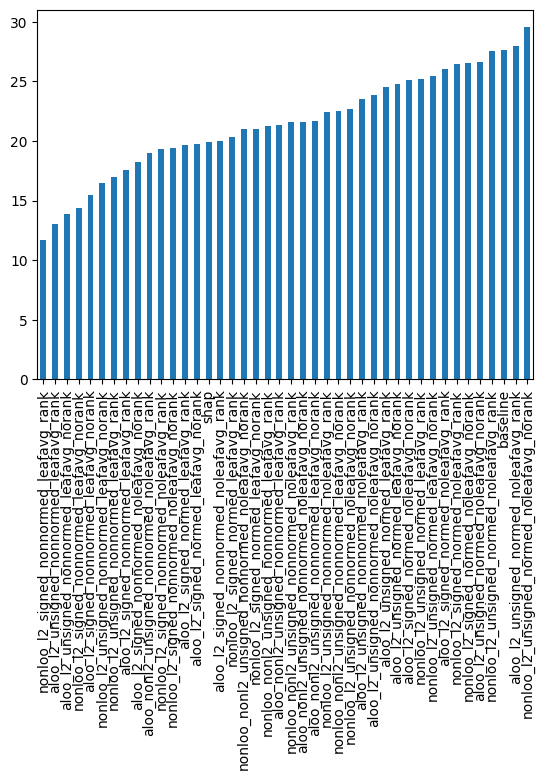

In [17]:
auroc_ranks = []
for data_result in data_results:
    auroc = data_result.drop("nclust", axis=1).apply(np.trapz, x=data_result["nclust"])
    # convert to ranking, i.e. 1 is lowest, 2 is second lowest, etc.
    auroc_rank = auroc.rank()
    auroc_ranks.append(auroc_rank)
# merge series in auroc_ranks by averaging the ranks corresponding to the same names
auroc_ranks = pd.concat(auroc_ranks, axis=1)
auroc_ranks = auroc_ranks.mean(axis=1)
auroc_ranks = auroc_ranks.sort_values()
auroc_ranks.plot(kind="bar")
plt.show()

In [18]:
auroc_ranks

nonloo_l2_signed_nonnormed_leafavg_rank             11.666667
aloo_l2_unsigned_nonnormed_leafavg_rank             13.000000
aloo_l2_unsigned_nonnormed_leafavg_norank           13.888889
nonloo_l2_signed_nonnormed_leafavg_norank           14.333333
aloo_l2_signed_nonnormed_leafavg_norank             15.444444
nonloo_l2_unsigned_nonnormed_leafavg_norank         16.444444
nonloo_l2_unsigned_nonnormed_leafavg_rank           17.000000
aloo_l2_signed_nonnormed_leafavg_rank               17.555556
aloo_l2_signed_nonnormed_noleafavg_norank           18.222222
aloo_nonl2_unsigned_nonnormed_noleafavg_rank        19.000000
nonloo_l2_signed_nonnormed_noleafavg_rank           19.333333
nonloo_l2_signed_nonnormed_noleafavg_norank         19.444444
aloo_l2_signed_normed_leafavg_rank                  19.666667
aloo_l2_signed_normed_leafavg_norank                19.777778
shap                                                19.888889
aloo_l2_signed_nonnormed_noleafavg_rank             20.000000
nonloo_l